# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [2]:
data = pd.read_csv('https://github.com/maminasladost/datasets_for_study/raw/main/train.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
# -- YOUR CODE HERE --
train.isna().sum()

id             0
keyword       44
location    1760
text           0
target         0
dtype: int64

In [6]:
train.fillna("", inplace=True)

In [7]:
test.isna().sum()

id            0
keyword      17
location    773
text          0
target        0
dtype: int64

In [8]:
test.fillna("", inplace=True)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [9]:
# -- YOUR CODE HERE --
train.target.value_counts()

0    3024
1    2305
Name: target, dtype: int64

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [10]:
# -- YOUR CODE HERE --
popular_keywords = train.keyword.value_counts()[:10].index

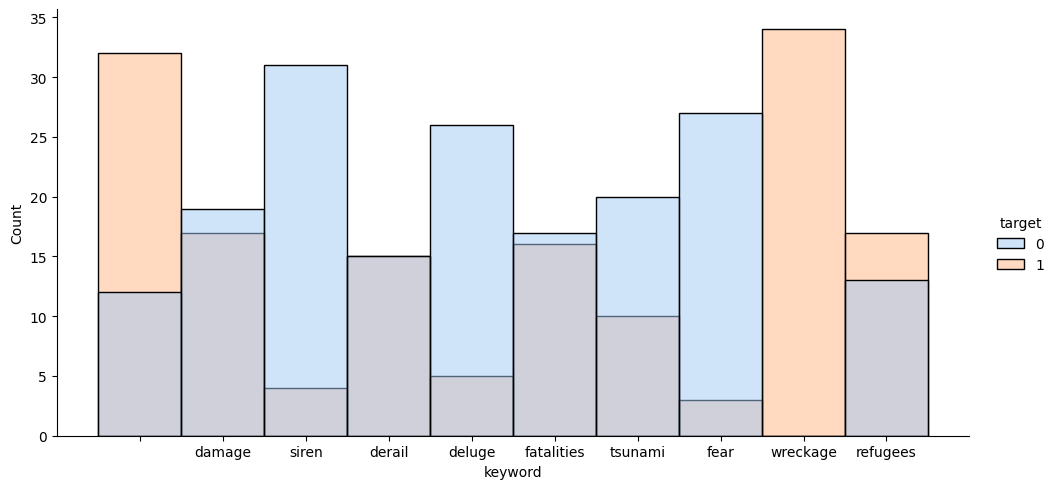

In [11]:
sns.displot(data=train[train['keyword'].isin(popular_keywords)], x="keyword", hue="target", multiple="layer", palette="pastel", height=5, aspect=2);

**Выводы**: wreckage, fatalities, refugees скорее всего относят объект к катастрофе (dizaster)
siren, deluge, tsunami, fear скорее нет

## Задание 3 (0.5 балла)

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [12]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [13]:
# -- YOUR CODE HERE --
train_new = train.copy()
train_new.text = (train['keyword'] + " " + train['location'] + " " +  train['text']).values
train_new.drop(["keyword",'location',"id"], inplace=True, axis=1)

test_new = test.copy()
test_new.text = (test['keyword'] + " " + test['location'] + " " +  test['text']).values
test_new.drop(["keyword",'location',"id"], inplace=True, axis=1)

In [14]:
train_new.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# -- YOUR CODE HERE --
vec = CountVectorizer()
X = vec.fit_transform(train_new.text)
print(f"Получившаяся матрица имеет размер {X.shape}")

Получившаяся матрица имеет размер (5329, 18455)


## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось?

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [16]:
from string import punctuation

def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    # -- YOUR CODE HERE --
    return True if any([True for i in s if i.isdigit()]) else False

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    # -- YOUR CODE HERE --
    return True if any([True for i in s if i in punctuation]) else False

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    # -- YOUR CODE HERE --
    return True if s[0] == "#" else False

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    # -- YOUR CODE HERE --
    return True if s[0] == "@" else False

def investigate_vocabulary(vocabulary):
    # -- YOUR CODE HERE --
    voc_keys = vocabulary.keys()

    print('With digit:      ', sum([1 for i in voc_keys if contains_digit(i) == True]) # -- YOUR CODE HERE --
          )
    print('With punctuation:', sum([1 for i in voc_keys if contains_punctuation(i) == True]) # -- YOUR CODE HERE --
          )
    print('Hashtags:        ', sum([1 for i in voc_keys if is_hashtag(i) == True]) # -- YOUR CODE HERE --
          )
    print('Mentions:        ', sum([1 for i in voc_keys if is_mention(i) == True]) # -- YOUR CODE HERE --
          )




In [17]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [18]:
investigate_vocabulary(vec.vocabulary_)

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [19]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

tw = TweetTokenizer()
vec1 = CountVectorizer(tokenizer=tw.tokenize)
vec1.fit_transform(train_new.text);

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
investigate_vocabulary(vec1.vocabulary_)

With digit:       3939
With punctuation: 7338
Hashtags:         1470
Mentions:         1679


**Сравнение:** TweetTokenizer выявил больше слов в целом и более четко разделил на токены все данные. так появились данные для хэштегов и для упоминаний

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно:

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [21]:
s = "asdjfkajdsf kalsdjf k;lajsd fkjasdfkl jasdf "
TweetTokenizer().tokenize(s)

['asdjfkajdsf', 'kalsdjf', 'k', ';', 'lajsd', 'fkjasdfkl', 'jasdf']

In [22]:
import nltk
from nltk.stem import SnowballStemmer
nltk.download('stopwords');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    # -- YOUR CODE HERE --
    return all(char.isalpha() and ord(char) < 128 for char in s)

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    # -- YOUR CODE HERE --
    return (all(i in punctuation or i in "()[]{}" for i in s)) & any([i in "()[]{}" for i in s])

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    # -- YOUR CODE HERE --
    return (s[0] == "#") & (contains_only_latin_letters(s[1:]))

def custom_tokenizer(s: str) -> List[str]:
    # Кастомный токенайзер

    s = s.lower()
    raw_tokens = TweetTokenizer().tokenize(s)
    final_tokens = []
    snowball = SnowballStemmer(language='english')

    for token in raw_tokens:
      if ((contains_only_latin_letters(token)) | (is_emoji(token)) | (is_hashtag(token))) & (token not in nltk.corpus.stopwords.words('english')):

        final_tokens.append(snowball.stem(token))

    return final_tokens




In [24]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [25]:
# -- YOUR CODE HERE --
train_new.text[:10].apply(custom_tokenizer)

1186    [bridg, ash, australia, collaps, trent, bridg,...
4071    [hail, carol, stream, illinoi, great, michigan...
5461    [polic, houston, cnn, tennesse, movi, theater,...
5787        [riot, still, riot, coupl, hour, left, class]
7445    [wound, lake, highland, crack, path, wipe, mor...
151     [airplan, somewher, expert, franc, begin, exam...
915     [bloodi, isol, citi, world, perth, came, kill,...
1305                    [burn, except, idk, realli, burn]
2570                  [destroy, (, ask, ), destroy, hous]
7399    [wound, maracay, nirgua, venezuela, polic, off...
Name: text, dtype: object

In [26]:
train_new

,text,target
1186,bridge%20collapse Ashes 2015: AustraliaÛªs c...,0
4071,"hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1
5461,police Houston CNN: Tennessee movie theater s...,1
5787,rioting Still rioting in a couple of hours le...,1
7445,wounds Lake Highlands Crack in the path where ...,0
...,...,...
5226,obliteration Merica! @Eganator2000 There aren'...,0
5390,panic just had a panic attack bc I don't have...,0
860,blood Omron HEM-712C Automatic Blood Pressure...,0
7603,Officials say a quarantine is in place at an...,1


## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [27]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, token_pattern=None)

train_new_counts = vectorizer.fit_transform(train_new.text).toarray()
test_new_counts = vectorizer.transform(test_new.text).toarray()

X_train = pd.DataFrame(data=train_new_counts)
y_train = train_new["target"].reset_index(drop=True)

X_test = pd.DataFrame(data=test_new_counts)
y_test = test_new["target"].reset_index(drop=True)

2. Обучите LogisticRegression на полученных признаках.


In [28]:
from sklearn.linear_model import LogisticRegression
# -- YOUR CODE HERE --
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

3. Посчитайте метрику f1-score на тестовых данных.

In [29]:
from sklearn.metrics import f1_score

# -- YOUR CODE HERE --
f1_score(y_test, lr.predict(X_test))

0.752017213555675

## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1
# -- YOUR CODE HERE --
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer,
                             token_pattern=None)

train_new_tf = vectorizer.fit_transform(train_new.text).toarray()
test_new_tf = vectorizer.transform(test_new.text).toarray()

X_train = pd.DataFrame(data=train_new_tf)
y_train = train_new["target"].reset_index(drop=True)

X_test = pd.DataFrame(data=test_new_tf)
y_test = test_new["target"].reset_index(drop=True)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f'F1 score: {f1_score(y_test, lr.predict(X_test)):.3f}')

F1 score: 0.741


1. **Ответ:** Качество ухудшилось

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [31]:
# 2
# -- YOUR CODE HERE --
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer,
                             max_df=0.9,
                             token_pattern=None)

train_new_tf = vectorizer.fit_transform(train_new.text).toarray()
test_new_tf = vectorizer.transform(test_new.text).toarray()

X_train = pd.DataFrame(data=train_new_tf)
y_train = train_new["target"].reset_index(drop=True)

X_test = pd.DataFrame(data=test_new_tf)
y_test = test_new["target"].reset_index(drop=True)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f'F1 score: {f1_score(y_test, lr.predict(X_test)):.3f}')

F1 score: 0.741


In [32]:
X_train.shape[1]

10486

2. **Ответ:** Качество не изменилось, ровно как и размер матрицы

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества?

In [33]:
# 3
# -- YOUR CODE HERE --
for min_df in np.arange(0.01, 0.06, 0.01):
  vectorizer = TfidfVectorizer(
      tokenizer=custom_tokenizer,
      max_df=0.9,
      min_df=min_df,
      token_pattern=None
      )

  train_new_tf = vectorizer.fit_transform(train_new.text).toarray()
  test_new_tf = vectorizer.transform(test_new.text).toarray()

  X_train = pd.DataFrame(data=train_new_tf)
  y_train = train_new["target"].reset_index(drop=True)

  X_test = pd.DataFrame(data=test_new_tf)
  y_test = test_new["target"].reset_index(drop=True)

  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  print(f'min_df={min_df}\nF1 score: {f1_score(y_test, lr.predict(X_test)):.3f}\nnumber of columns: {X_test.shape[1]}\n' )

min_df=0.01
F1 score: 0.626
number of columns: 129

min_df=0.02
F1 score: 0.406
number of columns: 24

min_df=0.03
F1 score: 0.290
number of columns: 9

min_df=0.04
F1 score: 0.136
number of columns: 5

min_df=0.05
F1 score: 0.000
number of columns: 2



3. **Ответ:** Размеры уменьшаются, но качество существенно ухудшается на при установлении min_fd из списка [0.01, 0.02, 0.03, 0.04, 0.05]

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [35]:
from sklearn.feature_extraction.text import HashingVectorizer

# -- YOUR CODE HERE --
vectorizer = HashingVectorizer(tokenizer=custom_tokenizer,
                               n_features=5000,
                               token_pattern=None)

train_new_tf = vectorizer.fit_transform(train_new.text).toarray()
test_new_tf = vectorizer.transform(test_new.text).toarray()

X_train = pd.DataFrame(data=train_new_tf)
y_train = train_new["target"].reset_index(drop=True)

X_test = pd.DataFrame(data=test_new_tf)
y_test = test_new["target"].reset_index(drop=True)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f'F1 score: {f1_score(y_test, lr.predict(X_test)):.3f}')

F1 score: 0.719


2. Какой из подходов показал самый высокий результат?

 **Ответ:** Лучшие результаты у CountVectorizer

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

Ответ: f1 score уже 0.75 на тестовых данных, поэтому попробую достичь показателя повыше

In [36]:
# -- YOUR CODE HERE --
vectorizer = CountVectorizer(tokenizer=custom_tokenizer,
                             max_df=0.8,
                             min_df=3,
                             token_pattern=None)

train_new_tf = vectorizer.fit_transform(train_new.text).toarray()
test_new_tf = vectorizer.transform(test_new.text).toarray()

X_train = pd.DataFrame(data=train_new_tf)
y_train = train_new["target"].reset_index(drop=True)

X_test = pd.DataFrame(data=test_new_tf)
y_test = test_new["target"].reset_index(drop=True)

lr = LogisticRegression(C=0.55)
lr.fit(X_train, y_train)
print(f'F1 score: {f1_score(y_test, lr.predict(X_test)):.3f}')


F1 score: 0.761
